# Predictive Healthcare Task - PwC

## Here is the background information on your task
We’ll stay in Bern for our next dataset project.

PwC is working closely with a network of doctors from Germany. The doctors are interested in finding the possible adverse effects of drugs used to treat neurological pain.

Besides treatment with usual drugs such as gapapentin or lyrica, doctors have found tramal to be a good remedy against neurological pain. If all of these have a similar effect, it would be interesting for the doctors to compare the adverse effects of tramal to gabapentin or lyrica. Depending on the patient, they could then prescribe the medication with fewer adverse effects. 

The US has a central database, hosted by the FDA. The FDA Adverse Event Reporting System (FAERS) is a database that contains information on adverse event and medication error reports submitted to FDA. The database is designed to support the FDA’s post-marketing safety surveillance programme for drug and therapeutic biologic products. 

## Here is your task & What will be done
 - Analyze 2019 FAERS data to find the top 10 Tramal adverse effects.
 - Compare Tramal and Lyrica's adverse effects.
 - Suggest further investigations based on dataset findings.
Jakob asks you to create a PowerPoint slide deck while tackling the following steps. Use screenshots and diagrams to illustrate your findings as well.

### Step 1

Create a descriptive overview of adverse effects of tramal based on the available FAERS datasets, which you’ll find in your resource section. For your analysis, only use the FAERS data from the year 2019.

Show the 10 most common adverse effects as they are reported in the FAERS database. Jakob loves bar plots, so would be great if you use one.

### Step 2

Compare tramal to another medication called lyrica that is also commonly used to treat neurological pain. Are the adverse effects similar?

Use Rscript to solve the task and make sure using it in your presentation.

### Step 3

Define what further investigations might be helpful in determining whether a certain drug might be more preferable over another drug. Base your solution on the results of your dataset work.

In [1]:
# Importing NumPy for numerical computations
import numpy as np

# Importing Pandas for data manipulation and analysis
import pandas as pd

# Importing Matplotlib for data visualization
import matplotlib.pyplot as plt

# Importing Seaborn for statistical data visualization
import seaborn as sns

# Importing Scikit-learn for machine learning tasks
from sklearn import datasets, linear_model

In [2]:
# Read each file into separate DataFrames
DRUG19Q1 = pd.read_table('/Users/thomashobson/Documents/PwC dataset/Task 5 - Predictive Healthcare/faers_ascii_2019Q1/ascii/DRUG19Q1.txt', sep = '$', encoding='ISO-8859-1', low_memory=False)
DRUG19Q2 = pd.read_table('/Users/thomashobson/Documents/PwC dataset/Task 5 - Predictive Healthcare/faers_ascii_2019Q2/ascii/DRUG19Q2.txt', sep = '$', encoding='ISO-8859-1', low_memory=False)
DRUG19Q3 = pd.read_table('/Users/thomashobson/Documents/PwC dataset/Task 5 - Predictive Healthcare/faers_ascii_2019Q3/ascii/DRUG19Q3.txt', sep = '$', encoding='ISO-8859-1', low_memory=False)
DRUG19Q4 = pd.read_table('/Users/thomashobson/Documents/PwC dataset/Task 5 - Predictive Healthcare/faers_ascii_2019Q4/ascii/DRUG19Q4.txt', sep = '$', encoding='ISO-8859-1', low_memory=False)

# Concatenate the DataFrames vertically (along rows)
merged_data = pd.concat([DRUG19Q1, DRUG19Q2, DRUG19Q3, DRUG19Q4], ignore_index=True)

# merged_data now contains all the rows from the four files

In [3]:
merged_data.head(10)

,primaryid,caseid,drug_seq,role_cod,drugname,prod_ai,val_vbm,route,dose_vbm,cum_dose_chr,cum_dose_unit,dechal,rechal,lot_num,exp_dt,nda_num,dose_amt,dose_unit,dose_form,dose_freq
0,1000661812,10006618,1,PS,LIPITOR,ATORVASTATIN CALCIUM,1,NaN,UNK,NaN,NaN,U,NaN,NaN,NaN,20702.0,NaN,NaN,FILM-COATED TABLET,NaN
1,1000661812,10006618,2,SS,BENTYL,DICYCLOMINE HYDROCHLORIDE,1,NaN,UNK,NaN,NaN,U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1000661812,10006618,3,SS,DICYCLOMINE,DICYCLOMINE HYDROCHLORIDE,1,NaN,UNK,NaN,NaN,U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1000808590,10008085,1,PS,SANDOSTATIN LAR DEPOT,OCTREOTIDE ACETATE,1,Intramuscular,"20 MG, BIW",NaN,NaN,NaN,NaN,NaN,NaN,21008.0,20.0,MG,NaN,QOW
4,1000808590,10008085,2,SS,SANDOSTATIN LAR DEPOT,OCTREOTIDE ACETATE,1,Intramuscular,"30 MG, QMO",NaN,NaN,NaN,NaN,NaN,NaN,21008.0,30.0,MG,NaN,/month
5,1000808590,10008085,3,SS,SANDOSTATIN LAR DEPOT,OCTREOTIDE ACETATE,1,Intramuscular,"10 MG EVERY 4 WEEKS (2 WEEKS POST 40 MG DOSE, ...",NaN,NaN,NaN,NaN,NaN,NaN,21008.0,10.0,MG,NaN,/month
6,1000808590,10008085,4,SS,SANDOSTATIN LAR DEPOT,OCTREOTIDE ACETATE,1,Intramuscular,"30 MG EVERY 4 WEEKS (2 WEEKS POST 10 MG DOSE, ...",NaN,NaN,NaN,NaN,NaN,NaN,21008.0,30.0,MG,NaN,/month
7,1000808590,10008085,5,SS,SANDOSTATIN LAR DEPOT,OCTREOTIDE ACETATE,1,Intramuscular,"40 MG, QMO (EVERY 4 WEEKS)",NaN,NaN,NaN,NaN,NaN,NaN,21008.0,40.0,MG,NaN,/month
8,1000808590,10008085,6,SS,SANDOSTATIN LAR DEPOT,OCTREOTIDE ACETATE,1,Intramuscular,"20 MG, Q2W",NaN,NaN,NaN,NaN,NaN,NaN,21008.0,20.0,MG,NaN,NaN
9,1000808590,10008085,7,SS,SANDOSTATIN LAR DEPOT,OCTREOTIDE ACETATE,1,Intramuscular,"30 MG, Q2W",NaN,NaN,NaN,NaN,NaN,NaN,21008.0,30.0,MG,NaN,NaN


In [4]:
# Reading the additional four files
REAC19Q1 = pd.read_table('/Users/thomashobson/Documents/PwC dataset/Task 5 - Predictive Healthcare/faers_ascii_2019Q1/ascii/REAC19Q1.txt', sep = '$')
REAC19Q2 = pd.read_table('/Users/thomashobson/Documents/PwC dataset/Task 5 - Predictive Healthcare/faers_ascii_2019Q2/ascii/REAC19Q2.txt', sep = '$')
REAC19Q3 = pd.read_table('/Users/thomashobson/Documents/PwC dataset/Task 5 - Predictive Healthcare/faers_ascii_2019Q3/ascii/REAC19Q3.txt', sep = '$')
REAC19Q4 = pd.read_table('/Users/thomashobson/Documents/PwC dataset/Task 5 - Predictive Healthcare/faers_ascii_2019Q4/ascii/REAC19Q4.txt', sep = '$')

# Merging the additional files based on the common primary key column
merged_data_AE = merged_data.merge(REAC19Q1, on='primaryid', how='inner')
merged_data_AE = merged_data.merge(REAC19Q2, on='primaryid', how='inner')
merged_data_AE = merged_data.merge(REAC19Q3, on='primaryid', how='inner')
merged_data_AE = merged_data.merge(REAC19Q4, on='primaryid', how='inner')


In [5]:
merged_data_AE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8824897 entries, 0 to 8824896
Data columns (total 23 columns):
 #   Column         Dtype  
---  ------         -----  
 0   primaryid      int64  
 1   caseid_x       int64  
 2   drug_seq       int64  
 3   role_cod       object 
 4   drugname       object 
 5   prod_ai        object 
 6   val_vbm        int64  
 7   route          object 
 8   dose_vbm       object 
 9   cum_dose_chr   float64
 10  cum_dose_unit  object 
 11  dechal         object 
 12  rechal         object 
 13  lot_num        object 
 14  exp_dt         object 
 15  nda_num        float64
 16  dose_amt       float64
 17  dose_unit      object 
 18  dose_form      object 
 19  dose_freq      object 
 20  caseid_y       int64  
 21  pt             object 
 22  drug_rec_act   object 
dtypes: float64(3), int64(5), object(15)
memory usage: 1.5+ GB


In [6]:
merged_data_AE.drop_duplicates(inplace=True)
merged_data_AE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8824897 entries, 0 to 8824896
Data columns (total 23 columns):
 #   Column         Dtype  
---  ------         -----  
 0   primaryid      int64  
 1   caseid_x       int64  
 2   drug_seq       int64  
 3   role_cod       object 
 4   drugname       object 
 5   prod_ai        object 
 6   val_vbm        int64  
 7   route          object 
 8   dose_vbm       object 
 9   cum_dose_chr   float64
 10  cum_dose_unit  object 
 11  dechal         object 
 12  rechal         object 
 13  lot_num        object 
 14  exp_dt         object 
 15  nda_num        float64
 16  dose_amt       float64
 17  dose_unit      object 
 18  dose_form      object 
 19  dose_freq      object 
 20  caseid_y       int64  
 21  pt             object 
 22  drug_rec_act   object 
dtypes: float64(3), int64(5), object(15)
memory usage: 1.5+ GB


In [7]:
import string
merged_data_AE['drugname'] = merged_data_AE['drugname'].astype(str)
merged_data_AE['drugname'] = merged_data_AE['drugname'].apply(lambda x: x.lower())

In [20]:
# Filter the DataFrame for rows where 'drugname' contains 'tramal'
tramal_data = merged_data_AE[merged_data_AE['drugname'].str.contains('tramal', case=False, na=False)]

# Exclude specific values in the 'pt' column from the filtered 'tramal_data'
exclude_value_1 = 'Drug interaction'

filtered_tramal_data = tramal_data[~tramal_data['pt'].isin([exclude_value_1, exclude_value_2])]

# Count occurrences of values in the filtered 'pt' column
value_counts = filtered_tramal_data['pt'].value_counts()

# Get the top 10 most occurring values
top_10_values_T = value_counts.head(10)

# Display the top 10 most occurring values
print(top_10_values_T)

pt
Pyrexia                  25
Pruritus                 21
Dyspnoea                 20
Nausea                   19
Syncope                  15
Pneumonia                15
Decreased appetite       14
Peripheral swelling      11
Hyponatraemia            11
Loss of consciousness    11
Name: count, dtype: int64


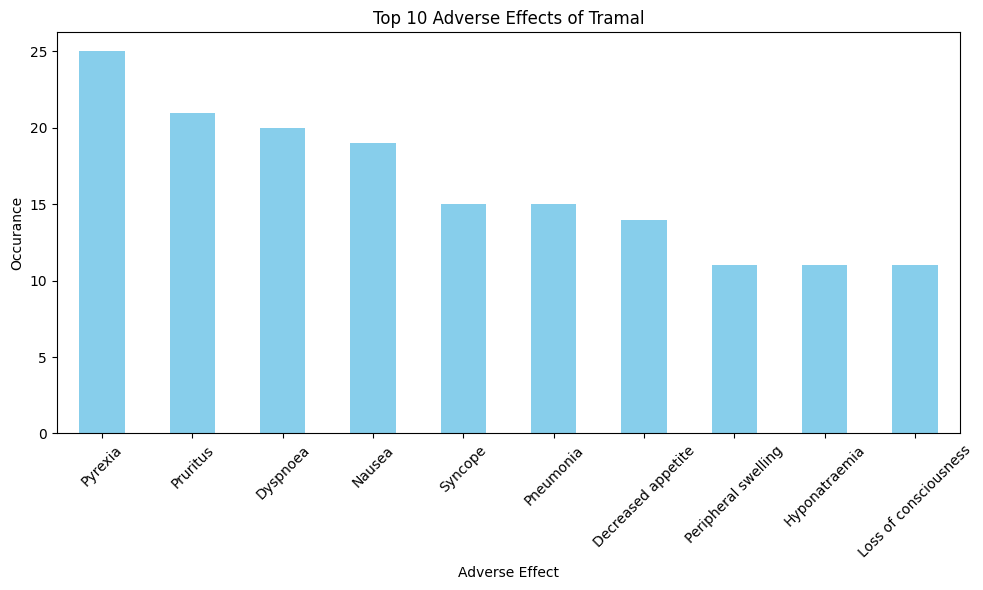

In [21]:
# Plotting the top 10 most occurring values on a bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
top_10_values_T.plot(kind='bar', color='skyblue')
plt.title('Top 10 Adverse Effects of Tramal')
plt.xlabel('Adverse Effect')
plt.ylabel('Occurance')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

In [22]:
# Filter the DataFrame for rows where 'drugname' contains 'tramal'
tramal_data = merged_data_AE[merged_data_AE['drugname'].str.contains('lyrica', case=False, na=False)]

# Exclude specific values in the 'pt' column from the filtered 'tramal_data'
exclude_value_1 = 'Drug interaction'
exclude_value_2 = 'Intentional product use issue'
exclude_value_3 = 'Intentional product misuse'
exclude_value_4 = 'Off label use'
exclude_value_5 = 'Therapeutic product effect incomplete'
exclude_value_6 = 'Drug ineffective'

filtered_tramal_data = tramal_data[~tramal_data['pt'].isin([exclude_value_1, exclude_value_2, exclude_value_3, exclude_value_4, exclude_value_5, exclude_value_6])]

# Count occurrences of values in the filtered 'pt' column
value_counts = filtered_tramal_data['pt'].value_counts()

# Get the top 10 most occurring values
top_10_values_L = value_counts.head(10)

# Display the top 10 most occurring values
print(top_10_values_L)

pt
Pain                   1997
Malaise                1480
Insomnia                959
Pain in extremity       895
Feeling abnormal        883
Withdrawal syndrome     859
Weight increased        710
Headache                687
Nausea                  682
Fall                    656
Name: count, dtype: int64


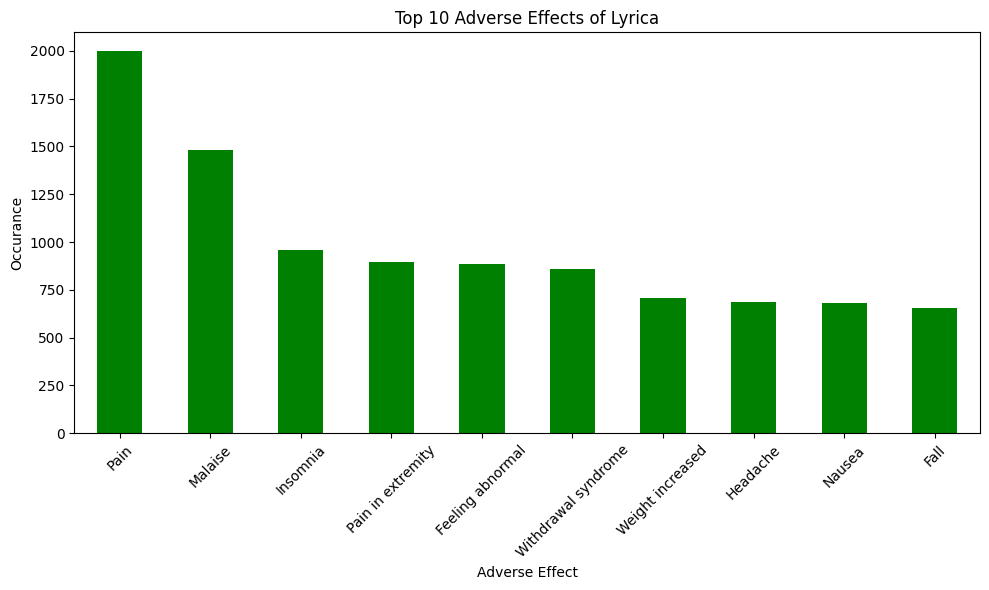

In [25]:
# Plotting the top 10 most occurring values on a bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
top_10_values_L.plot(kind='bar', color='green')
plt.title('Top 10 Adverse Effects of Lyrica')
plt.xlabel('Adverse Effect')
plt.ylabel('Occurance')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()